# MLDS - Supervised Learning

## Authors:
### . Jamal Aourraz
### . Zakaria Hajji

## Data Preparation

In [354]:
library(FactoMineR) #PCA
library(MASS) #QDA & LNR
library(rpart) #CART
library(e1071) #SVM & NB
library(class) #KNN
library(randomForest) #RF
library(stats)# LGR
library(caret) #ConfusionMatrix
library(ROCR) #ROC (AUC)
library(ROSE) #Balancing data
library(ggplot2) #Plots

In [355]:
data<-read.table("creditcard.csv",sep = ",",header=T)

In [356]:
data[1:10,]

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.3598071,-0.07278117,2.53634674,1.3781552,-0.33832077,0.46238778,0.239598554,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.12853936,-0.18911484,0.133558377,-0.021053053,149.62,0
0,1.1918571,0.26615071,0.16648011,0.4481541,0.06001765,-0.08236081,-0.078802983,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.16717040,0.12589453,-0.008983099,0.014724169,2.69,0
1,-1.3583541,-1.34016307,1.77320934,0.3797796,-0.50319813,1.80049938,0.791460956,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.32764183,-0.13909657,-0.055352794,-0.059751841,378.66,0
1,-0.9662717,-0.18522601,1.79299334,-0.8632913,-0.01030888,1.24720317,0.237608940,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.64737603,-0.22192884,0.062722849,0.061457629,123.50,0
2,-1.1582331,0.87773675,1.54871785,0.4030339,-0.40719338,0.09592146,0.592940745,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.20600959,0.50229222,0.219422230,0.215153147,69.99,0
2,-0.4259659,0.96052304,1.14110934,-0.1682521,0.42098688,-0.02972755,0.476200949,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.23279382,0.10591478,0.253844225,0.081080257,3.67,0
4,1.2296576,0.14100351,0.04537077,1.2026127,0.19188099,0.27270812,-0.005159003,0.08121294,0.4649600,⋯,-0.167716266,-0.270709726,-0.15410379,-0.78005542,0.75013694,-0.25723685,0.034507430,0.005167769,4.99,0
7,-0.6442694,1.41796355,1.07438038,-0.4921990,0.94893409,0.42811846,1.120631358,-3.80786424,0.6153747,⋯,1.943465340,-1.015454710,0.05750353,-0.64970901,-0.41526657,-0.05163430,-1.206921081,-1.085339188,40.80,0
7,-0.8942861,0.28615720,-0.11319221,-0.2715261,2.66959866,3.72181806,0.370145128,0.85108444,-0.3920476,⋯,-0.073425100,-0.268091632,-0.20423267,1.01159180,0.37320468,-0.38415731,0.011747356,0.142404330,93.20,0
9,-0.3382618,1.11959338,1.04436655,-0.2221873,0.49936081,-0.24676110,0.651583206,0.06953859,-0.7367273,⋯,-0.246913937,-0.633752642,-0.12079408,-0.38504993,-0.06973305,0.09419883,0.246219305,0.083075649,3.68,0


## Exploratory Analysis

### Variables

In [357]:
str(data)

'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

### Variables Statistics

In [358]:
summary(data)

      Time              V1                  V2                  V3          
 Min.   :     0   Min.   :-56.40751   Min.   :-72.71573   Min.   :-48.3256  
 1st Qu.: 54202   1st Qu.: -0.92037   1st Qu.: -0.59855   1st Qu.: -0.8904  
 Median : 84692   Median :  0.01811   Median :  0.06549   Median :  0.1799  
 Mean   : 94814   Mean   :  0.00000   Mean   :  0.00000   Mean   :  0.0000  
 3rd Qu.:139320   3rd Qu.:  1.31564   3rd Qu.:  0.80372   3rd Qu.:  1.0272  
 Max.   :172792   Max.   :  2.45493   Max.   : 22.05773   Max.   :  9.3826  
       V4                 V5                   V6                 V7          
 Min.   :-5.68317   Min.   :-113.74331   Min.   :-26.1605   Min.   :-43.5572  
 1st Qu.:-0.84864   1st Qu.:  -0.69160   1st Qu.: -0.7683   1st Qu.: -0.5541  
 Median :-0.01985   Median :  -0.05434   Median : -0.2742   Median :  0.0401  
 Mean   : 0.00000   Mean   :   0.00000   Mean   :  0.0000   Mean   :  0.0000  
 3rd Qu.: 0.74334   3rd Qu.:   0.61193   3rd Qu.:  0.3986   3rd Qu

### Classes

In [359]:
unique(data[,"Class"])

[1] 0 1

### Boxplots

In [360]:
datad=data[,-which(names(data) %in% c("Time","Amount"))]

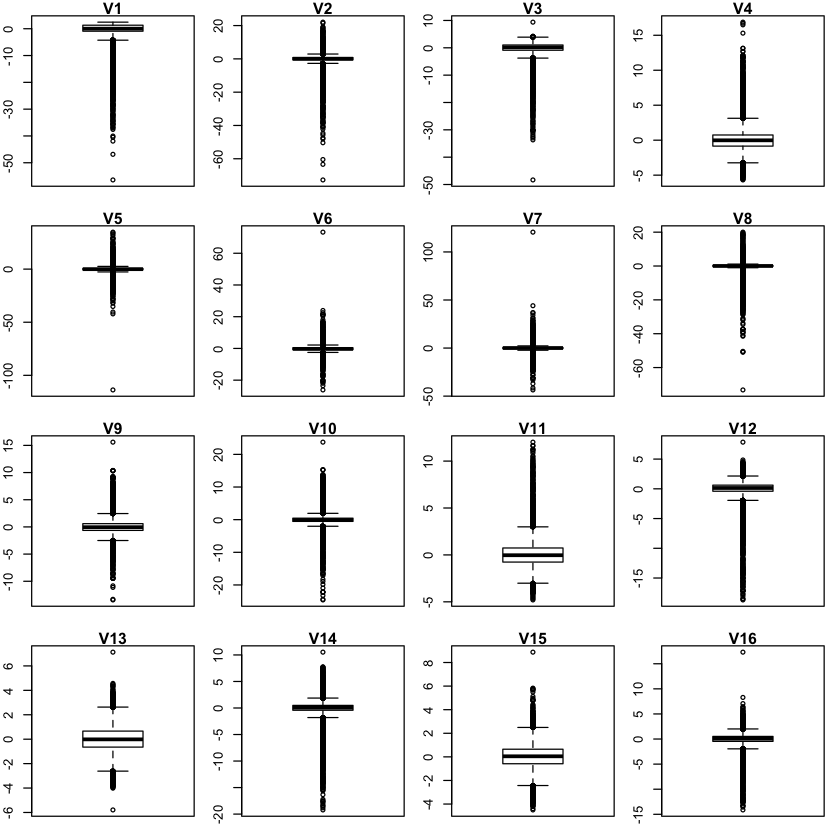

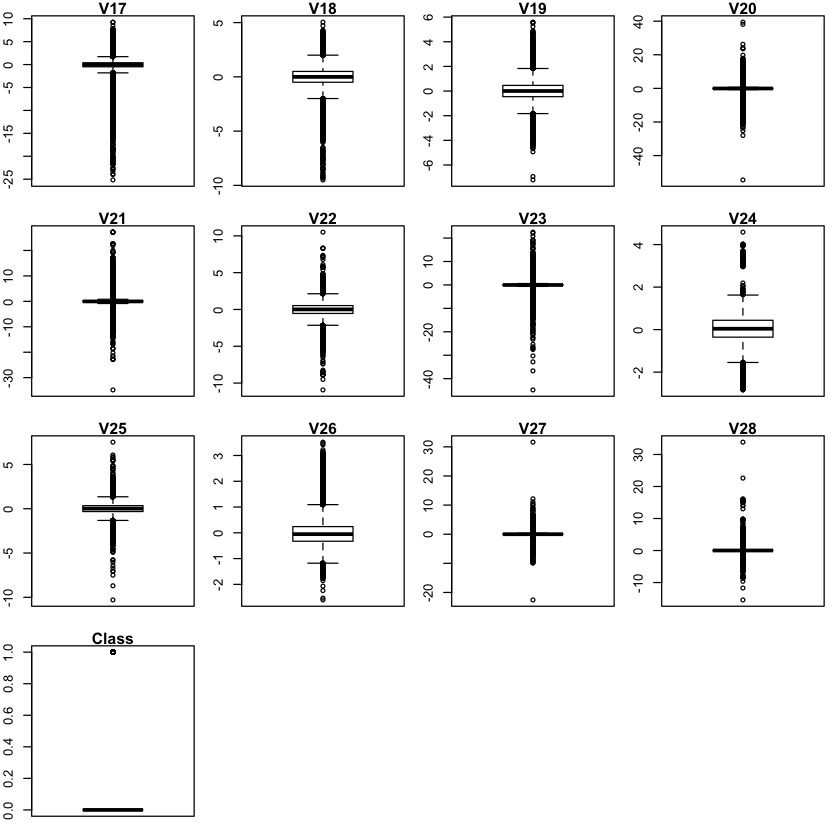

In [361]:
par(mfrow=c(4,4))
par(mar = c(1.5,2,1,1))
for (i in 1:length(datad)){
    boxplot(datad[,i],main=names(datad)[i],pars = list(boxwex = 0.8, staplewex = 0.5, outwex = 0.5))
}

### Histograms

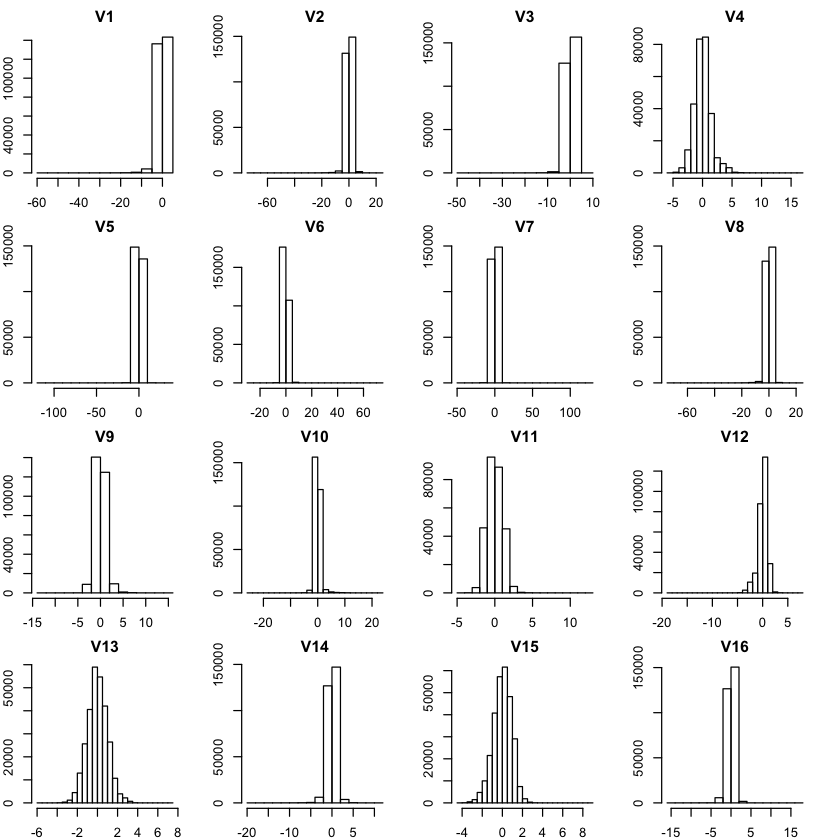

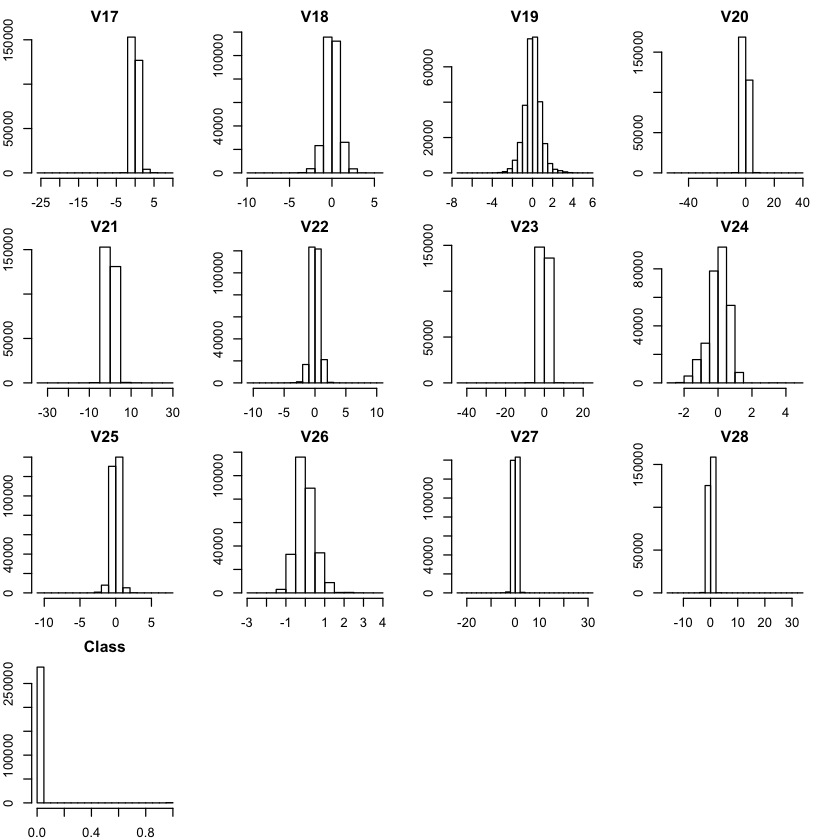

In [362]:
par(mfrow=c(4,4))
par(mar = c(2,2,2,2))
for (i in 1:length(datad)){
    hist(datad[,i],xlab="",ylab="",main = names(datad)[i])
}

### Balanced or Imbalanced Data?

In [363]:
table(data[,"Class"])


     0      1 
284315    492 

### Data Sampling

In [364]:
## Under Sampling
data_us = ovun.sample(Class~.,data = data, method = "under", p = 0.5,seed = 1)$data
## Over Sampling
data_os = ovun.sample(Class~.,data = data, method = "over", p = 0.5,seed = 1)$data
## combined under and over Sampling
data_uos = ovun.sample(Class~.,data = data, method = "both", p = 0.5,seed = 1)$data

In [365]:
# Classes of under sampled data
table(data_us$Class)


  0   1 
474 492 

In [366]:
# Classes of over sampled data
table(data_os$Class)


     0      1 
284315 284624 

In [367]:
# Classes of combined under & over sampled data
table(data_uos$Class)


     0      1 
142149 142658 

### Data Splitting: Train and Test

In [368]:
#Train Sample for Under sampled data
data_us_sample=sample(nrow(data_us),round(nrow(data_us)*0.75),replace = FALSE)
#Train Sample for Over sampled data
data_os_sample=sample(nrow(data_os),round(nrow(data_os)*0.75),replace = FALSE)
#Train Sample for Over sampled data
data_uos_sample=sample(nrow(data_uos),round(nrow(data_uos)*0.75),replace = FALSE)

In [369]:
## Train and Test sets for Under sampled data
data_us_train=data_us[data_us_sample,]
data_us_test=data_us[-data_us_sample,]
## Train and Test sets for Over sampled data
data_os_train=data_os[data_os_sample,]
data_os_test=data_os[-data_os_sample,]
## Train and Test sets for both sampled data
data_uos_train=data_uos[data_uos_sample,]
data_uos_test=data_uos[-data_uos_sample,]

In [370]:
c(nrow(data_us_train),nrow(data_us_test))

[1] 724 242

In [371]:
c(nrow(data_os_train),nrow(data_os_test))

[1] 426704 142235

In [372]:
c(nrow(data_uos_train),nrow(data_uos_test))

[1] 213605  71202

## Supervised Learning Algorithms

### Logistic Regression

In [373]:
lm_us=glm(Class~., data = data_us_train, family = quasibinomial)

In [374]:
lm_us_pred=predict(lm_us,newdata = data_us_test[,-31],type = "response")
lm_us_pred=ifelse(lm_us_pred>0.5,1,0)

In [375]:
confusionMatrix(as.factor(lm_us_pred), as.factor(data_us_test$Class), positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 112  13
         1   4 113
                                          
               Accuracy : 0.9298          
                 95% CI : (0.8899, 0.9585)
    No Information Rate : 0.5207          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8597          
 Mcnemar's Test P-Value : 0.05235         
                                          
            Sensitivity : 0.8968          
            Specificity : 0.9655          
         Pos Pred Value : 0.9658          
         Neg Pred Value : 0.8960          
             Prevalence : 0.5207          
         Detection Rate : 0.4669          
   Detection Prevalence : 0.4835          
      Balanced Accuracy : 0.9312          
                                          
       'Positive' Class : 1               
                                          

In [376]:
lm_us_roc=prediction(as.numeric(as.character(lm_us_pred)),data_us_test$Class)
lm_us_roc_perf=performance(lm_us_roc,measure = "tpr", x.measure = "fpr")

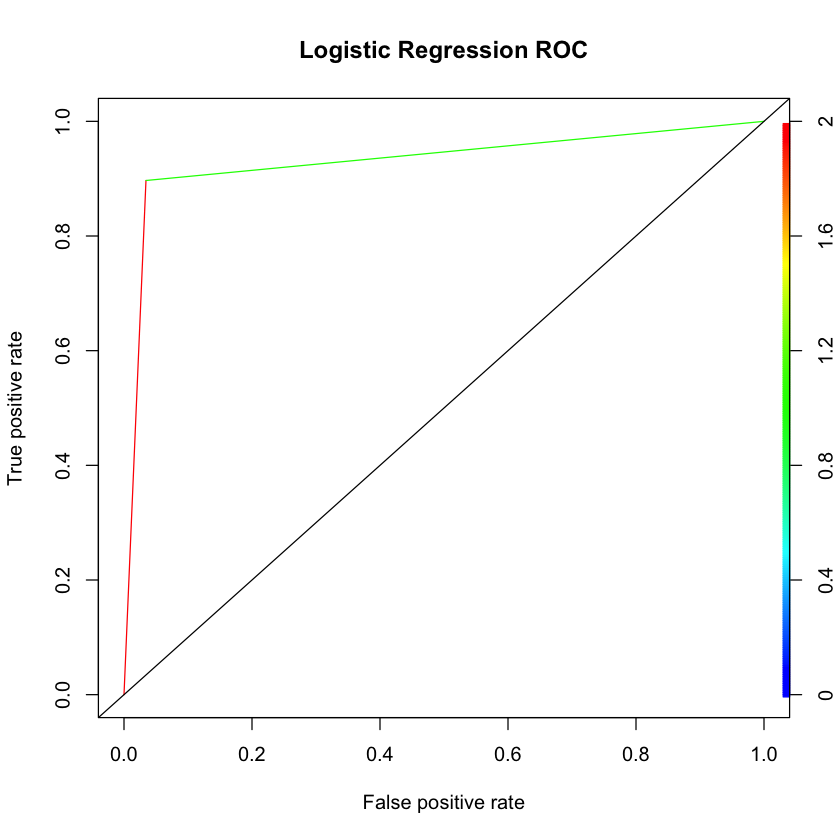

In [377]:
plot(lm_us_roc_perf,colorize=T,main="Logistic Regression ROC")
abline(a=0, b= 1)

In [378]:
lm_us_auc = performance(lm_us_roc, measure = "auc")
paste('Logistic Regression AUC:',as.numeric(lm_us_auc@y.values))

[1] "Logistic Regression AUC: 0.931171319102354"

### LDA

In [379]:
lda_us=lda(as.matrix(data_us_train[,-which(names(data) %in% c("Time","Amount","Class"))]),data_us_train$Class)
lda_us

Call:
lda(as.matrix(data_us_train[, -which(names(data) %in% c("Time", 
    "Amount", "Class"))]), grouping = data_us_train$Class)

Prior probabilities of groups:
        0         1 
0.4944751 0.5055249 

Group means:
          V1          V2         V3         V4          V5          V6
0  0.1584516 -0.05795297  0.1363711 0.05442489  0.01616114 -0.04713058
1 -4.7751884  3.66656828 -7.0549895 4.64593230 -3.14642574 -1.35803360
           V7          V8          V9          V10         V11         V12
0 -0.06279566 -0.01818292 -0.02181543  0.008793266 0.001202095  0.01080904
1 -5.69808466  0.33034268 -2.64949038 -5.850730376 3.866366658 -6.36984209
          V13         V14          V15         V16         V17          V18
0  0.04546097 -0.01264328 -0.006491911 -0.01382016  0.02622202  0.009639084
1 -0.11274149 -7.05396542 -0.069805151 -4.18705875 -6.67140922 -2.252298040
          V19         V20         V21          V22         V23         V24
0 0.008697905 -0.04246862 -0.01938303 -0.

In [380]:
lda_us_pred=predict(lda_us,data_us_test[,-which(names(data) %in% c("Time","Amount","Class"))])

In [381]:
confusionMatrix(lda_us_pred$class, as.factor(data_us_test$Class), positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 113  22
         1   3 104
                                         
               Accuracy : 0.8967         
                 95% CI : (0.8513, 0.932)
    No Information Rate : 0.5207         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7944         
 Mcnemar's Test P-Value : 0.0003182      
                                         
            Sensitivity : 0.8254         
            Specificity : 0.9741         
         Pos Pred Value : 0.9720         
         Neg Pred Value : 0.8370         
             Prevalence : 0.5207         
         Detection Rate : 0.4298         
   Detection Prevalence : 0.4421         
      Balanced Accuracy : 0.8998         
                                         
       'Positive' Class : 1              
                                         

In [382]:
lda_us_roc=prediction(as.numeric(as.character(lda_us_pred$class)),data_us_test$Class)
lda_us_roc_perf=performance(lda_us_roc,measure = "tpr", x.measure = "fpr")

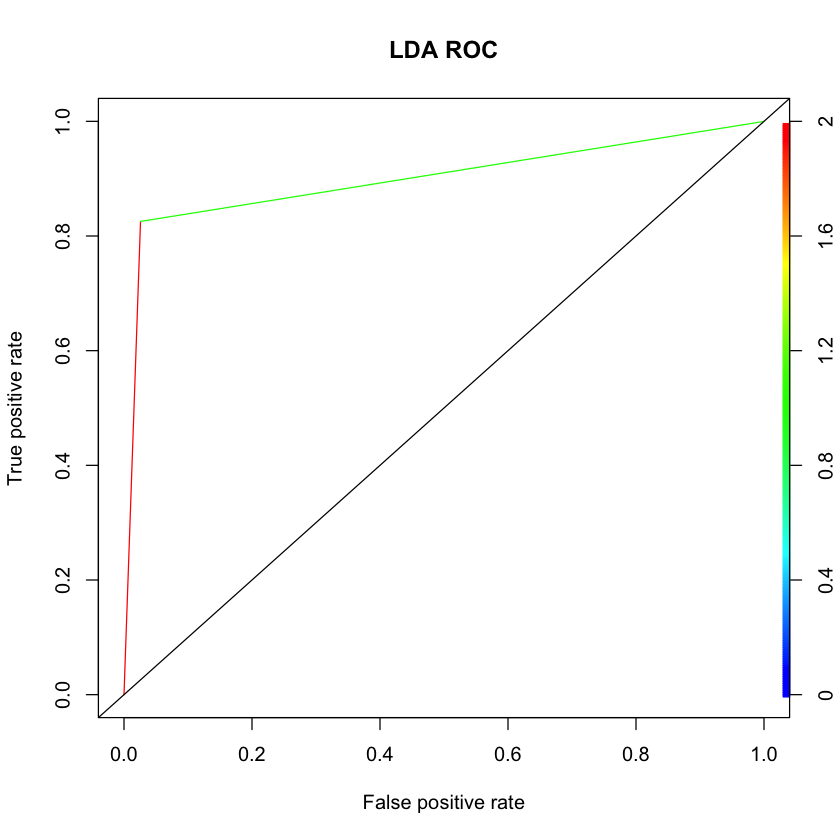

In [383]:
plot(lda_us_roc_perf,colorize=T, main="LDA ROC")
abline(a=0, b= 1)

In [384]:
lda_us_auc = performance(lda_us_roc, measure = "auc")
paste('LDA AUC:',as.numeric(lda_us_auc@y.values))

[1] "LDA AUC: 0.899767378215654"

### QDA

In [385]:
qda_us=qda(as.matrix(data_us_train[,-which(names(data) %in% c("Time","Amount","Class"))]),data_us_train$Class)
qda_us

Call:
qda(as.matrix(data_us_train[, -which(names(data) %in% c("Time", 
    "Amount", "Class"))]), grouping = data_us_train$Class)

Prior probabilities of groups:
        0         1 
0.4944751 0.5055249 

Group means:
          V1          V2         V3         V4          V5          V6
0  0.1584516 -0.05795297  0.1363711 0.05442489  0.01616114 -0.04713058
1 -4.7751884  3.66656828 -7.0549895 4.64593230 -3.14642574 -1.35803360
           V7          V8          V9          V10         V11         V12
0 -0.06279566 -0.01818292 -0.02181543  0.008793266 0.001202095  0.01080904
1 -5.69808466  0.33034268 -2.64949038 -5.850730376 3.866366658 -6.36984209
          V13         V14          V15         V16         V17          V18
0  0.04546097 -0.01264328 -0.006491911 -0.01382016  0.02622202  0.009639084
1 -0.11274149 -7.05396542 -0.069805151 -4.18705875 -6.67140922 -2.252298040
          V19         V20         V21          V22         V23         V24
0 0.008697905 -0.04246862 -0.01938303 -0.

In [386]:
qda_us_pred=predict(qda_us,data_us_test[,-which(names(data) %in% c("Time","Amount","Class"))])

In [387]:
confusionMatrix(qda_us_pred$class, as.factor(data_us_test$Class), positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 110  15
         1   6 111
                                          
               Accuracy : 0.9132          
                 95% CI : (0.8704, 0.9455)
    No Information Rate : 0.5207          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8267          
 Mcnemar's Test P-Value : 0.08086         
                                          
            Sensitivity : 0.8810          
            Specificity : 0.9483          
         Pos Pred Value : 0.9487          
         Neg Pred Value : 0.8800          
             Prevalence : 0.5207          
         Detection Rate : 0.4587          
   Detection Prevalence : 0.4835          
      Balanced Accuracy : 0.9146          
                                          
       'Positive' Class : 1               
                                          

In [388]:
qda_us_roc=prediction(as.numeric(as.character(qda_us_pred$class)),data_us_test$Class)
qda_us_roc_perf=performance(qda_us_roc,measure = "tpr", x.measure = "fpr")

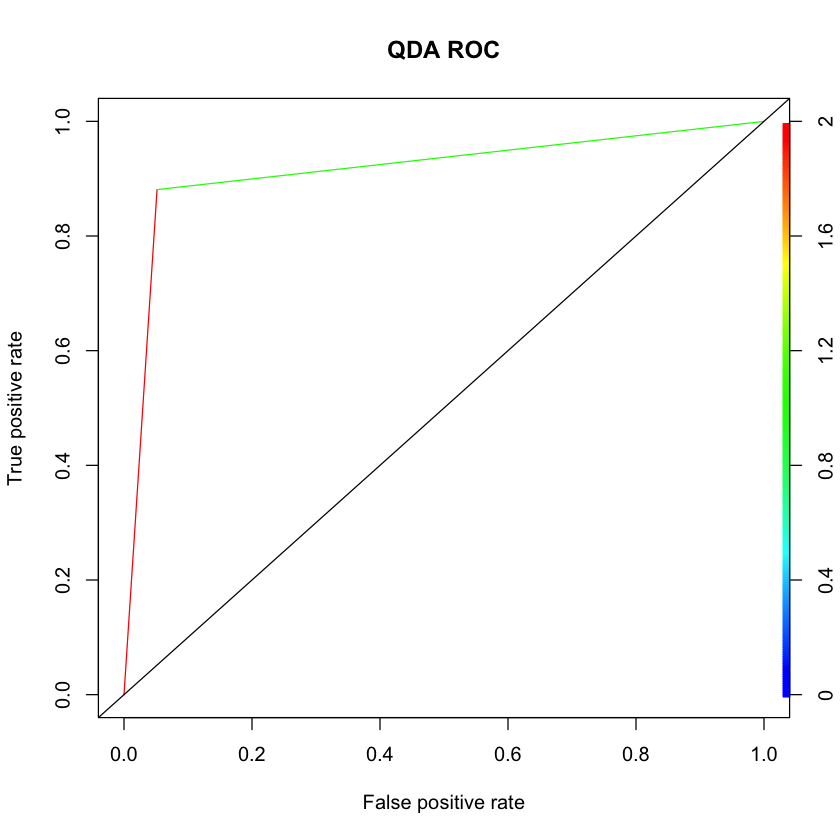

In [389]:
plot(qda_us_roc_perf,colorize=T, main="QDA ROC")
abline(a=0, b= 1)

In [390]:
qda_us_auc = performance(qda_us_roc, measure = "auc")
paste('QDA AUC:',as.numeric(qda_us_auc@y.values))

[1] "QDA AUC: 0.914614121510673"

### CART

In [391]:
cart_us_ctrl <- rpart.control(minsplit = 100, minbucket = 10, cp = 0, xval = 10)

In [392]:
cart_us <- rpart(formula = Class~., data = data_us_train, method = "class", control = cart_us_ctrl)
cart_us

n= 724 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 724 358 1 (0.49447514 0.50552486)  
  2) V14>=-2.299476 406  53 0 (0.86945813 0.13054187)  
    4) V4< 2.620584 368  32 0 (0.91304348 0.08695652) *
    5) V4>=2.620584 38  17 1 (0.44736842 0.55263158) *
  3) V14< -2.299476 318   5 1 (0.01572327 0.98427673) *

In [393]:
printcp(cart_us)


Classification tree:
rpart(formula = Class ~ ., data = data_us_train, method = "class", 
    control = cart_us_ctrl)

Variables actually used in tree construction:
[1] V14 V4 

Root node error: 358/724 = 0.49448

n= 724 

        CP nsplit rel error  xerror     xstd
1 0.837989      0   1.00000 1.04749 0.037556
2 0.011173      1   0.16201 0.17318 0.021032
3 0.000000      2   0.15084 0.20670 0.022768


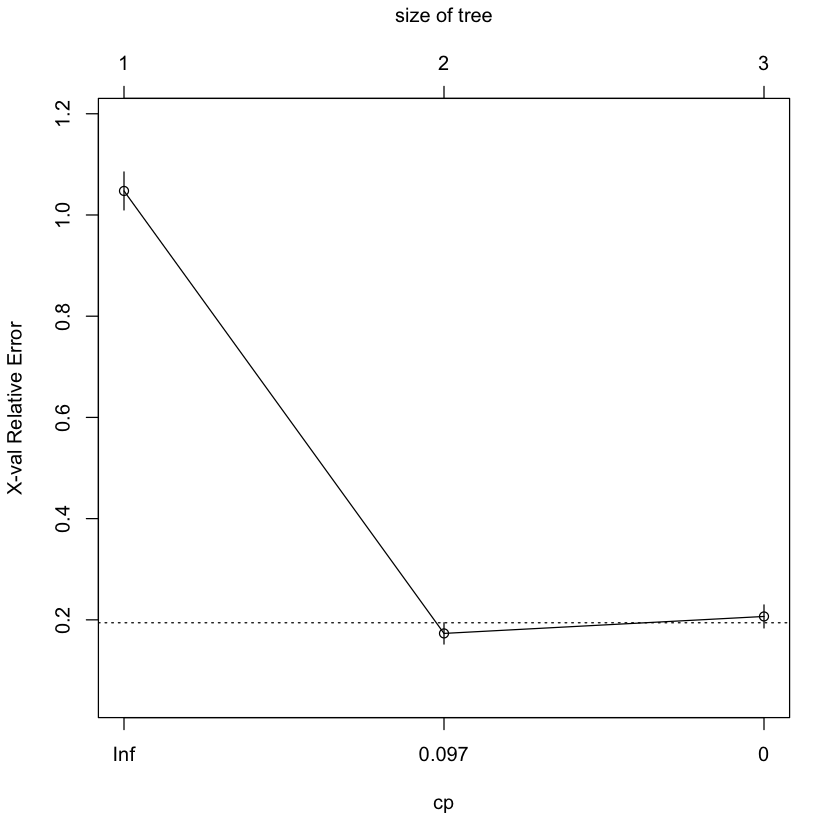

In [394]:
plotcp(cart_us)

In [395]:
cart_us_pred=predict(cart_us,data_us_test, type = "class")

In [396]:
confusionMatrix(as.factor(cart_us_pred), as.factor(data_us_test$Class), positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 106  16
         1  10 110
                                          
               Accuracy : 0.8926          
                 95% CI : (0.8466, 0.9286)
    No Information Rate : 0.5207          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7852          
 Mcnemar's Test P-Value : 0.3268          
                                          
            Sensitivity : 0.8730          
            Specificity : 0.9138          
         Pos Pred Value : 0.9167          
         Neg Pred Value : 0.8689          
             Prevalence : 0.5207          
         Detection Rate : 0.4545          
   Detection Prevalence : 0.4959          
      Balanced Accuracy : 0.8934          
                                          
       'Positive' Class : 1               
                                          

In [397]:
cart_us_roc=prediction(as.numeric(as.character(cart_us_pred)),data_us_test$Class)
cart_us_roc_perf=performance(cart_us_roc,measure = "tpr", x.measure = "fpr")

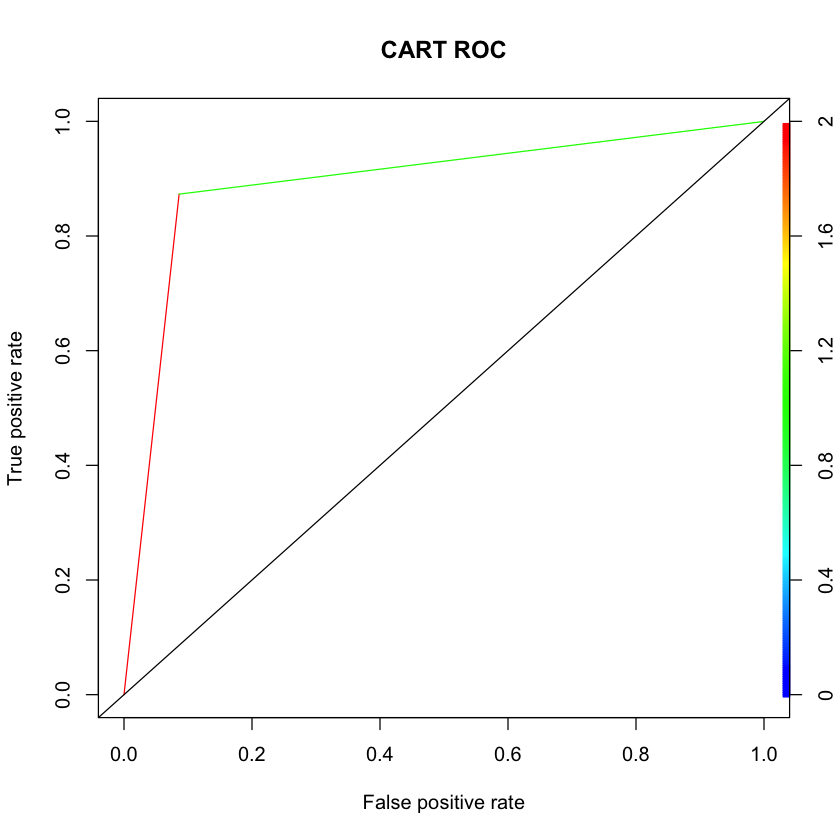

In [398]:
plot(cart_us_roc_perf,colorize=T, , main="CART ROC")
abline(a=0, b= 1)

In [399]:
cart_us_auc = performance(cart_us_roc, measure = "auc")
as.numeric(cart_us_auc@y.values)

[1] 0.8934045

### Random Forest

In [400]:
rf_us = randomForest(data_us_train[,-31], data_us_train$Class,ntree=100,importance=T)

Warning message in randomForest.default(data_us_train[, -31], data_us_train$Class, :
“The response has five or fewer unique values.  Are you sure you want to do regression?”

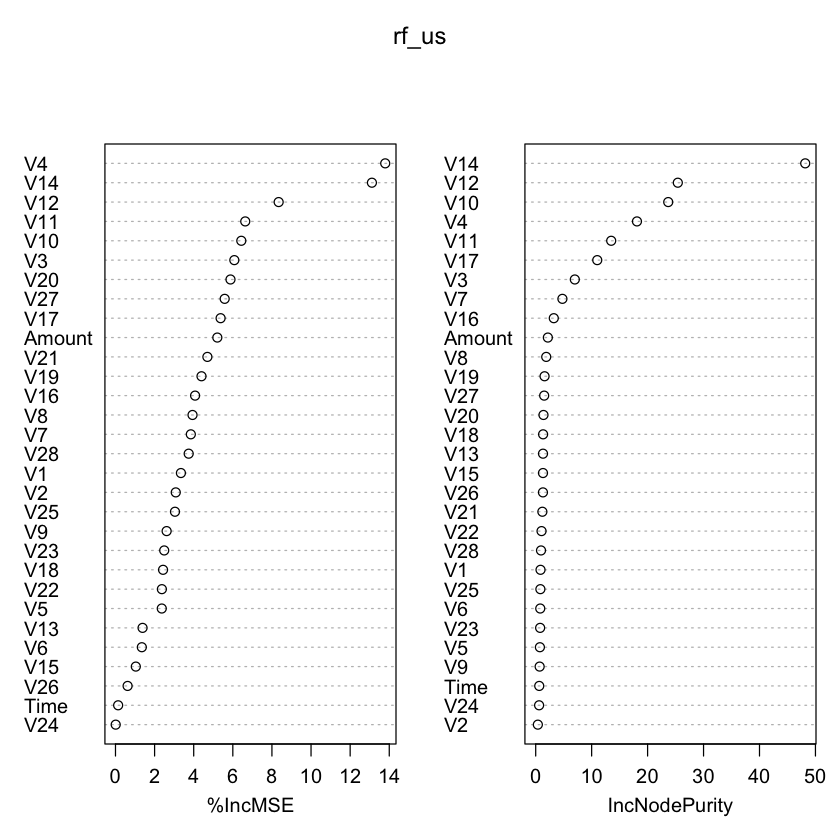

In [401]:
varImpPlot(rf_us)

In [402]:
rf_us_pred=predict(rf_us,newdata=data_us_test)
rf_us_pred=ifelse(rf_us_pred>0.5,1,0)

In [403]:
confusionMatrix(as.factor(rf_us_pred), as.factor(data_us_test$Class), positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 114  16
         1   2 110
                                         
               Accuracy : 0.9256         
                 95% CI : (0.885, 0.9553)
    No Information Rate : 0.5207         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.8517         
 Mcnemar's Test P-Value : 0.002183       
                                         
            Sensitivity : 0.8730         
            Specificity : 0.9828         
         Pos Pred Value : 0.9821         
         Neg Pred Value : 0.8769         
             Prevalence : 0.5207         
         Detection Rate : 0.4545         
   Detection Prevalence : 0.4628         
      Balanced Accuracy : 0.9279         
                                         
       'Positive' Class : 1              
                                         

In [404]:
rf_us_roc=prediction(as.numeric(as.character(rf_us_pred)),data_us_test$Class)
rf_us_roc_perf=performance(rf_us_roc,measure = "tpr", x.measure = "fpr")

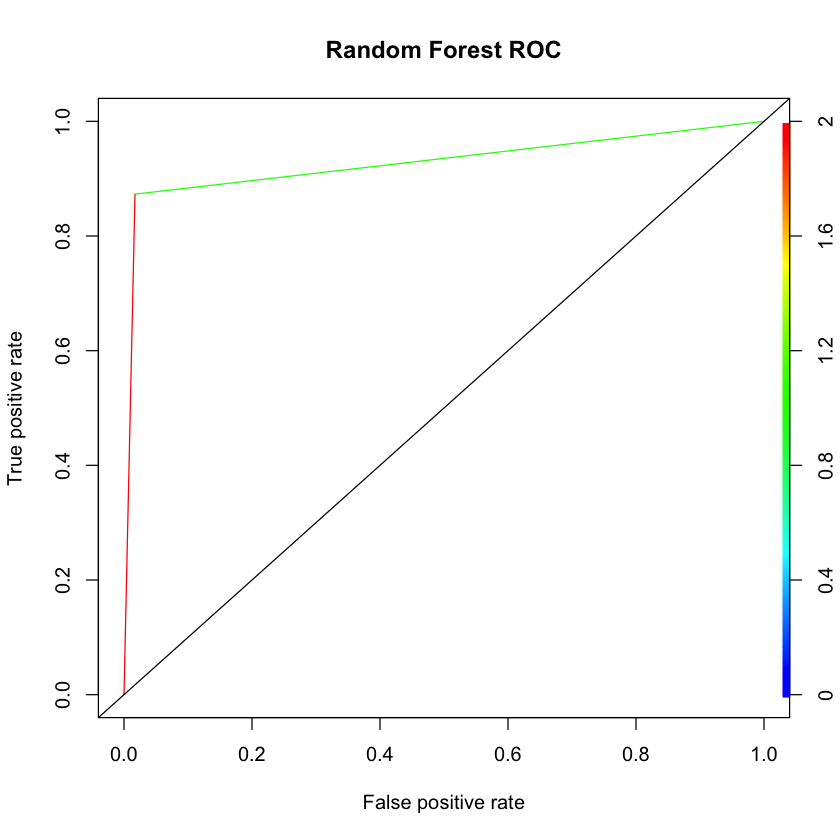

In [405]:
plot(rf_us_roc_perf,colorize=T, , main="Random Forest ROC")
abline(a=0, b= 1)

In [406]:
rf_us_auc = performance(rf_us_roc, measure = "auc")
as.numeric(rf_us_auc@y.values)

[1] 0.9278872

### KNN

In [407]:
knn_us <- knn(train = data_us_train, test = data_us_test, cl = data_us_train$Class, k = 5)

In [408]:
confusionMatrix(knn_us, as.factor(data_us_test$Class), positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 71 41
         1 45 85
                                          
               Accuracy : 0.6446          
                 95% CI : (0.5808, 0.7049)
    No Information Rate : 0.5207          
    P-Value [Acc > NIR] : 6.507e-05       
                                          
                  Kappa : 0.2871          
 Mcnemar's Test P-Value : 0.7463          
                                          
            Sensitivity : 0.6746          
            Specificity : 0.6121          
         Pos Pred Value : 0.6538          
         Neg Pred Value : 0.6339          
             Prevalence : 0.5207          
         Detection Rate : 0.3512          
   Detection Prevalence : 0.5372          
      Balanced Accuracy : 0.6433          
                                          
       'Positive' Class : 1               
                                          

In [409]:
knn_us_roc=prediction(as.numeric(as.character(knn_us)),data_us_test$Class)
knn_us_roc_perf=performance(knn_us_roc,measure = "tpr", x.measure = "fpr")

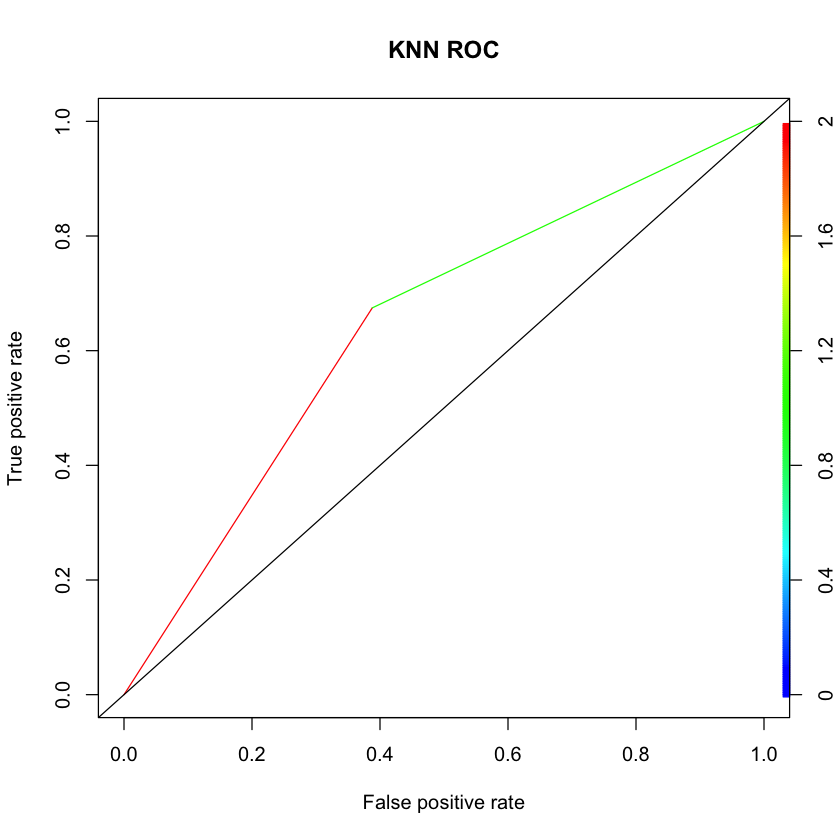

In [410]:
plot(knn_us_roc_perf,colorize=T,, main="KNN ROC")
abline(a=0, b= 1)

### Naive Bayess

In [411]:
nb_us = naiveBayes(as.factor(data_us_train$Class)~., data = data_us_train, laplace = 1)
nb_us$apriori

Y
  0   1 
358 366 

In [412]:
summary(nb_us)

        Length Class  Mode     
apriori  2     table  numeric  
tables  30     -none- list     
levels   2     -none- character
call     4     -none- call     

In [413]:
nb_us_pred <- predict(nb_us, data_us_test)

In [414]:
confusionMatrix(nb_us_pred, as.factor(data_us_test$Class), positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 114  19
         1   2 107
                                          
               Accuracy : 0.9132          
                 95% CI : (0.8704, 0.9455)
    No Information Rate : 0.5207          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8272          
 Mcnemar's Test P-Value : 0.0004803       
                                          
            Sensitivity : 0.8492          
            Specificity : 0.9828          
         Pos Pred Value : 0.9817          
         Neg Pred Value : 0.8571          
             Prevalence : 0.5207          
         Detection Rate : 0.4421          
   Detection Prevalence : 0.4504          
      Balanced Accuracy : 0.9160          
                                          
       'Positive' Class : 1               
                                          

In [415]:
nb_us_roc=prediction(as.numeric(as.character(nb_us_pred)),data_us_test$Class)

In [416]:
nb_us_roc_perf=performance(nb_us_roc,measure = "tpr", x.measure = "fpr")

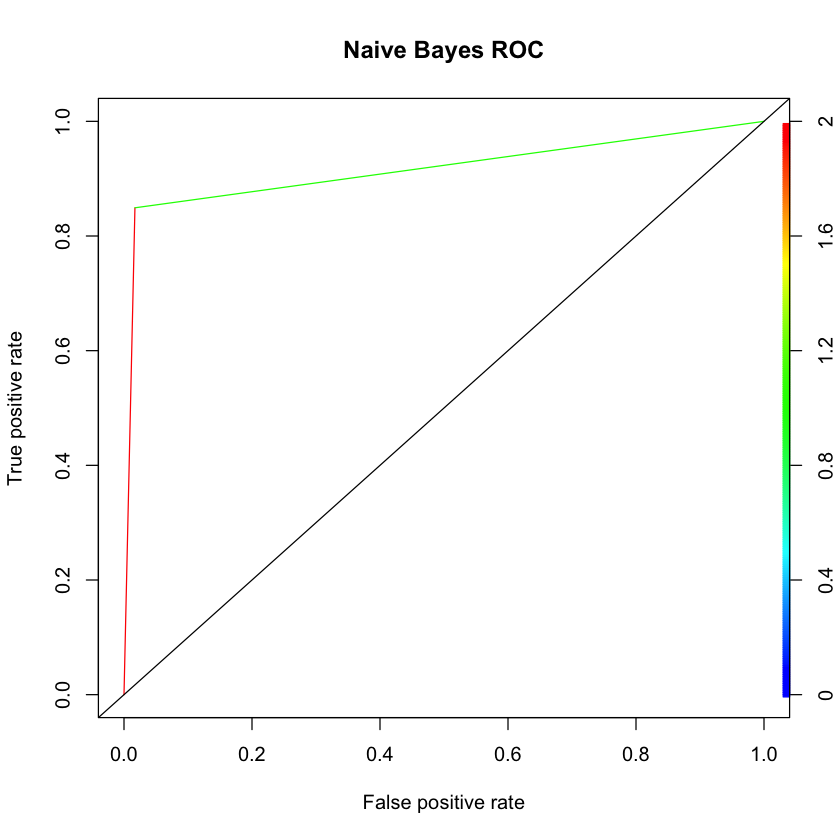

In [417]:
plot(nb_us_roc_perf,colorize=T, main="Naive Bayes ROC")
abline(a=0, b= 1)

In [418]:
nb_us_auc = performance(nb_us_roc, measure = "auc")
as.numeric(nb_us_auc@y.values)

[1] 0.9159825

### Linear SVM

In [419]:
lsvm_us <- svm(as.factor(data_us_train$Class) ~ ., data = data_us_train[,-29], kernel = "linear")
lsvm_us


Call:
svm(formula = as.factor(data_us_train$Class) ~ ., data = data_us_train[, 
    -29], kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 
      gamma:  0.03448276 

Number of Support Vectors:  99


In [420]:
lsvm_us_pred=predict(lsvm_us,newdata = data_us_test)

In [421]:
confusionMatrix(lsvm_us_pred, as.factor(data_us_test$Class), positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 112  15
         1   4 111
                                          
               Accuracy : 0.9215          
                 95% CI : (0.8801, 0.9521)
    No Information Rate : 0.5207          
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.8433          
 Mcnemar's Test P-Value : 0.02178         
                                          
            Sensitivity : 0.8810          
            Specificity : 0.9655          
         Pos Pred Value : 0.9652          
         Neg Pred Value : 0.8819          
             Prevalence : 0.5207          
         Detection Rate : 0.4587          
   Detection Prevalence : 0.4752          
      Balanced Accuracy : 0.9232          
                                          
       'Positive' Class : 1               
                                          

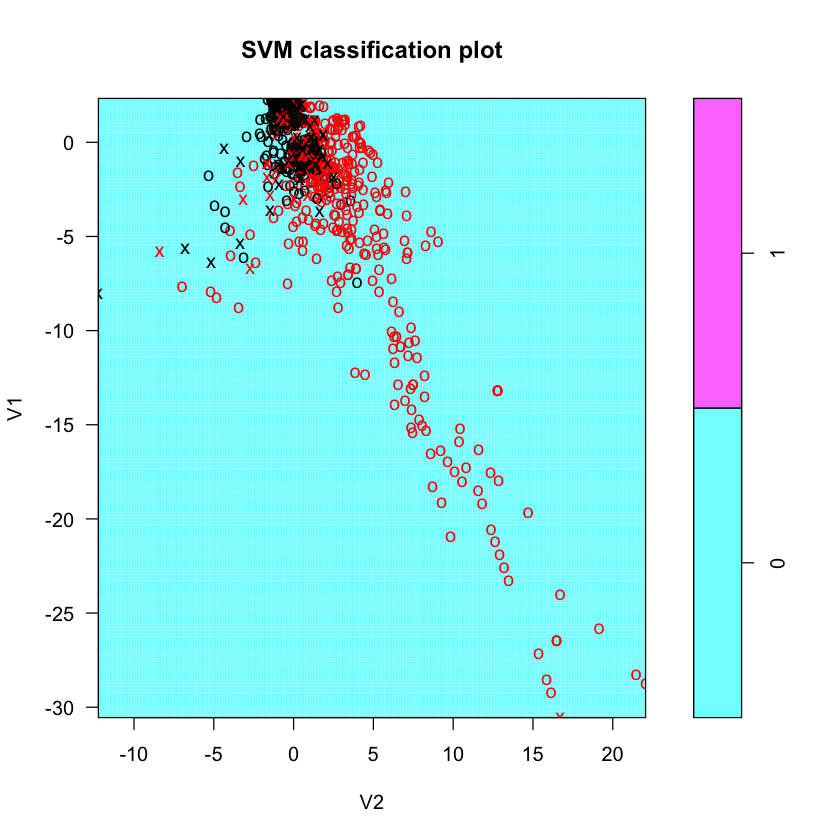

In [422]:
plot(lsvm_us, data = data_us_train, V1~V2, grid = 200)

In [423]:
lsvm_us_roc=prediction(as.numeric(as.character(lsvm_us_pred)),data_us_test$Class)

In [424]:
lsvm_us_roc_perf=performance(lsvm_us_roc,measure = "tpr", x.measure = "fpr")

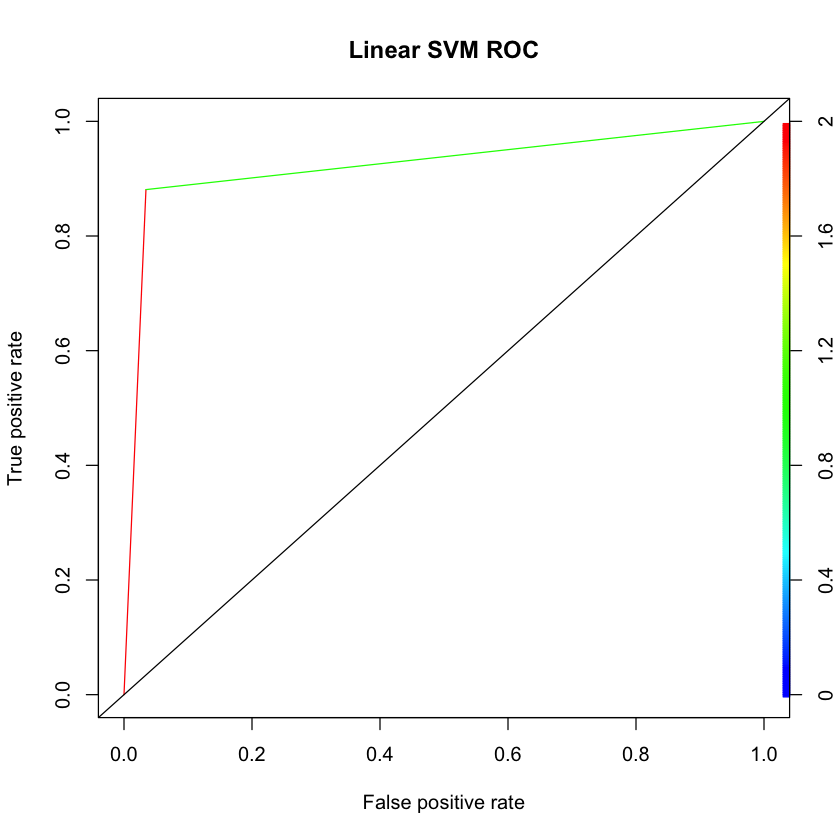

In [425]:
plot(lsvm_us_roc_perf,colorize=T, main="Linear SVM ROC")
abline(a=0, b= 1)

In [426]:
lsvm_us_auc = performance(lsvm_us_roc, measure = "auc")
as.numeric(lsvm_us_auc@y.values)

[1] 0.9232348

### Non Linear SVM

In [427]:
nlsvm_us <- svm(as.factor(data_us_train$Class) ~ ., data = data_us_train[,-29], kernel = "polynomial", degree=2)
nlsvm_us


Call:
svm(formula = as.factor(data_us_train$Class) ~ ., data = data_us_train[, 
    -29], kernel = "polynomial", degree = 2)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  2 
      gamma:  0.03448276 
     coef.0:  0 

Number of Support Vectors:  462


In [428]:
nlsvm_us_pred=predict(nlsvm_us,newdata = data_us_test)

In [429]:
confusionMatrix(nlsvm_us_pred, as.factor(data_us_test$Class), positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 109  45
         1   7  81
                                         
               Accuracy : 0.7851         
                 95% CI : (0.728, 0.8352)
    No Information Rate : 0.5207         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.575          
 Mcnemar's Test P-Value : 2.882e-07      
                                         
            Sensitivity : 0.6429         
            Specificity : 0.9397         
         Pos Pred Value : 0.9205         
         Neg Pred Value : 0.7078         
             Prevalence : 0.5207         
         Detection Rate : 0.3347         
   Detection Prevalence : 0.3636         
      Balanced Accuracy : 0.7913         
                                         
       'Positive' Class : 1              
                                         

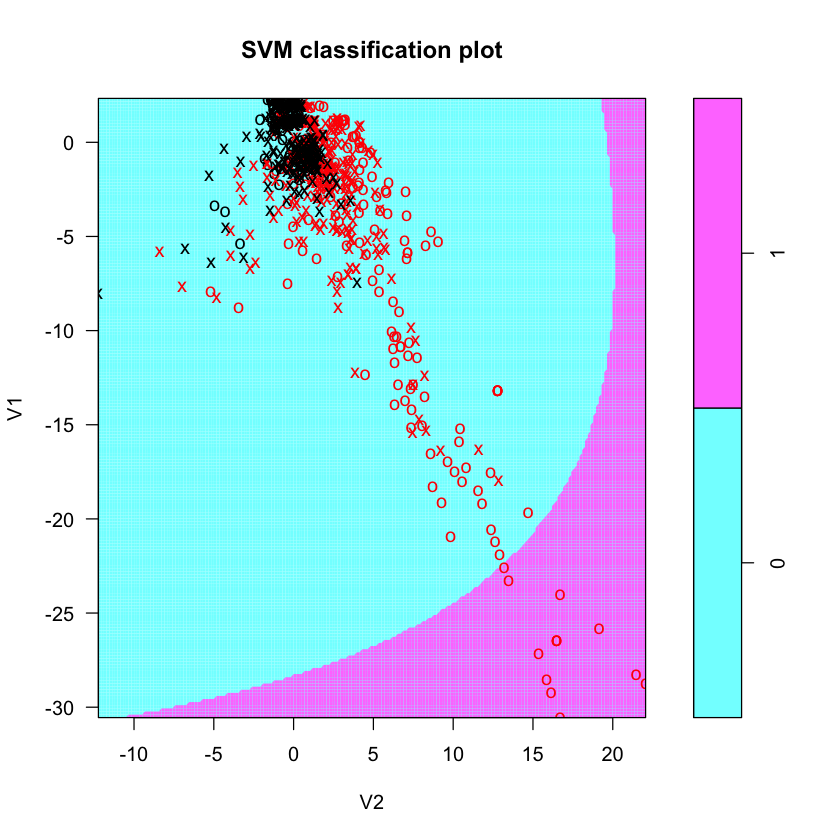

In [430]:
plot(nlsvm_us, data = data_us_train, V1~V2, grid = 200)

In [431]:
nlsvm_us_roc=prediction(as.numeric(as.character(nlsvm_us_pred)),data_us_test$Class)

In [432]:
nlsvm_us_roc_perf=performance(nlsvm_us_roc,measure = "tpr", x.measure = "fpr")

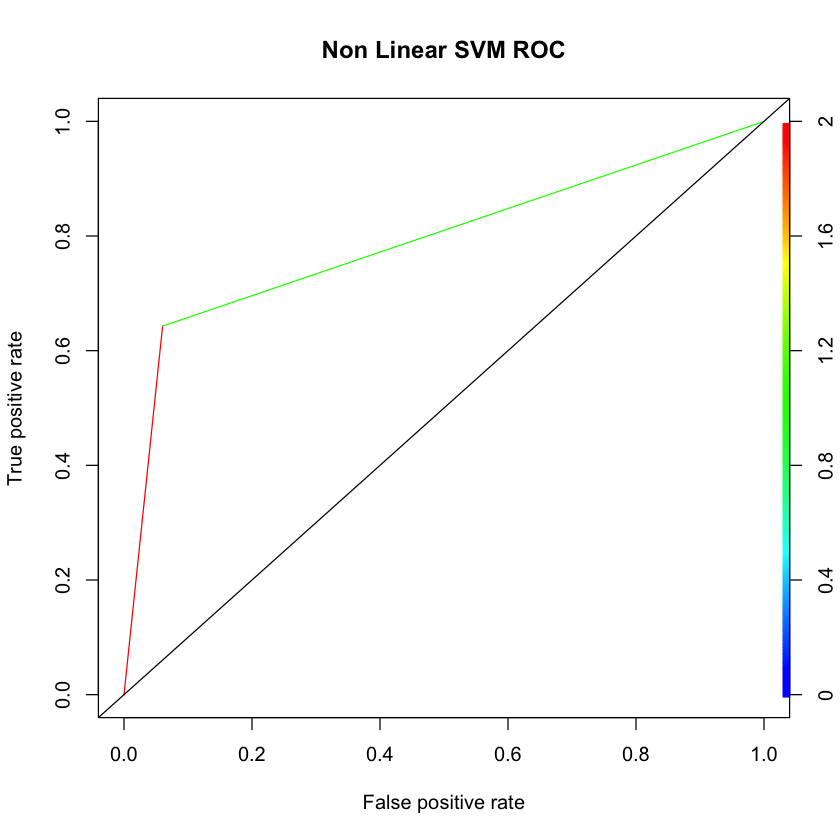

In [433]:
plot(nlsvm_us_roc_perf,colorize=T, main="Non Linear SVM ROC")
abline(a=0, b=1)

In [434]:
nlsvm_us_auc = performance(nlsvm_us_roc, measure = "auc")
as.numeric(nlsvm_us_auc@y.values)

[1] 0.7912562

## Comparing the different algorithms' results

In [435]:
df=data.frame(fpr=c(unlist(lda_us_roc_perf@x.values),unlist(qda_us_roc_perf@x.values),
                    unlist(cart_us_roc_perf@x.values), unlist(rf_us_roc_perf@x.values),
                    unlist(knn_us_roc_perf@x.values), unlist(nb_us_roc_perf@x.values),
                    unlist(lsvm_us_roc_perf@x.values), unlist(nlsvm_us_roc_perf@x.values)
                    ),
              tpr=c(unlist(lda_us_roc_perf@y.values), unlist(qda_us_roc_perf@y.values),
                    unlist(cart_us_roc_perf@y.values), unlist(rf_us_roc_perf@y.values),
                    unlist(knn_us_roc_perf@y.values), unlist(nb_us_roc_perf@y.values),
                    unlist(lsvm_us_roc_perf@y.values), unlist(nlsvm_us_roc_perf@y.values)
                    ),
              Algorithm=c("LDA","QDA","CART","Random Forest","KNN","Naive Bayess","Linear SVM","Non Linear SVM"))

In [436]:
p=ggplot(data = df, aes(x=fpr, y=tpr)) + geom_line(aes(colour=Algorithm))

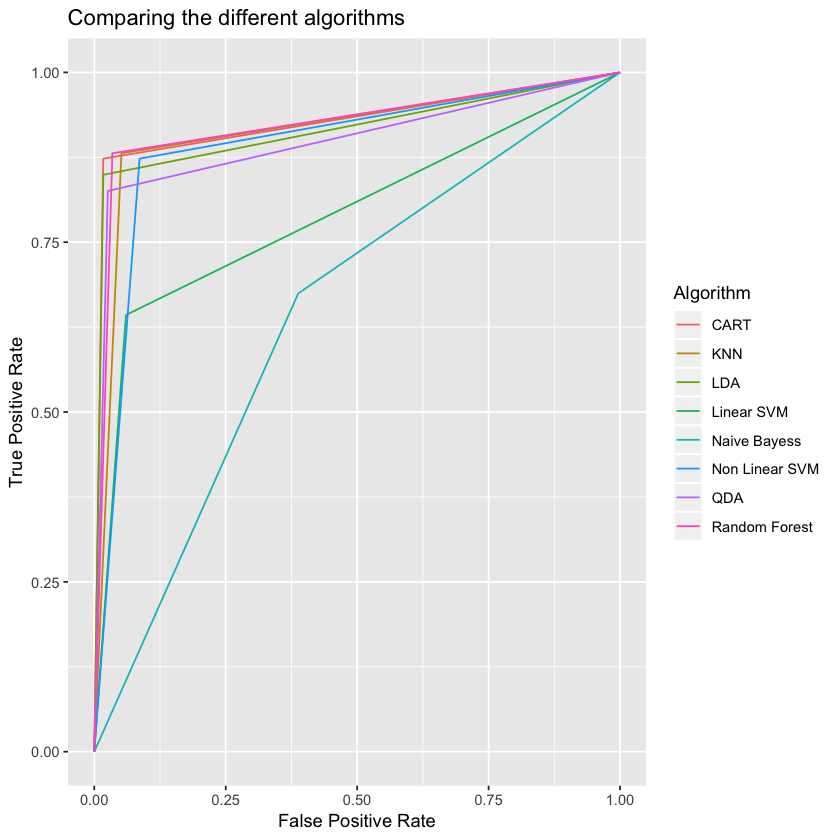

In [437]:
p + labs(x="False Positive Rate",y="True Positive Rate",title="Comparing the different algorithms")